In [ ]:
pip install opencv-python numpy matplotlib

Please upload your two images (e.g., imgs1.png and imgs2.png)


Saving imgs1.png to imgs1.png
Saving imgs2.png to imgs2.png

 Uploaded files: ['imgs1.png', 'imgs2.png']

Reading images from:
 Left: input/imgs1.png
 Right: input/imgs2.png

 Stage 0 complete — Images loaded and preprocessed successfully!


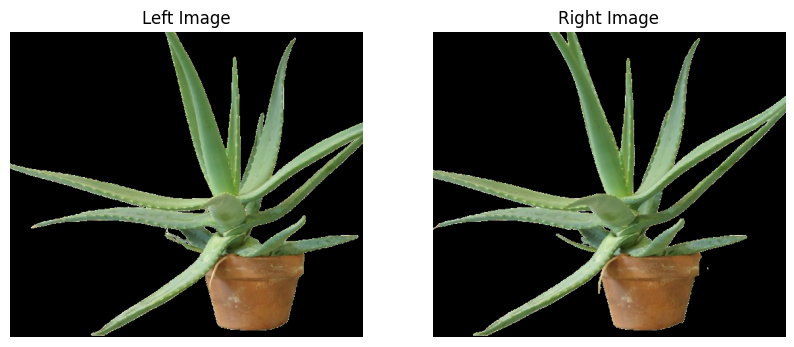

In [ ]:
# === Stage 0:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import files
import shutil

input_dir = "input"
output_dir = "output"
os.makedirs(input_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# --- Step 0.2: Upload files from your computer ---
print("Please upload your two images (e.g., imgs1.png and imgs2.png)")
uploaded = files.upload()

# --- Step 0.3: Move uploaded files into 'input/' folder ---
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(input_dir, filename))

print("\n Uploaded files:", os.listdir(input_dir))

# --- Step 0.4: Auto-detect first two images in the folder ---
images = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if len(images) < 2:
    raise FileNotFoundError("Please upload at least two image files!")

left_path = os.path.join(input_dir, images[0])
right_path = os.path.join(input_dir, images[1])

print(f"\nReading images from:\n Left: {left_path}\n Right: {right_path}")

# --- Step 0.5: Load images safely ---
imgL = cv2.imread(left_path, cv2.IMREAD_UNCHANGED)
imgR = cv2.imread(right_path, cv2.IMREAD_UNCHANGED)

if imgL is None or imgR is None:
    raise FileNotFoundError("❌ One or both images failed to load. Check file formats.")

# --- Step 0.6: Handle alpha channels ---
alphaL = imgL[:, :, 3] if imgL.shape[2] == 4 else np.ones(imgL.shape[:2], dtype=np.uint8) * 255
alphaR = imgR[:, :, 3] if imgR.shape[2] == 4 else np.ones(imgR.shape[:2], dtype=np.uint8) * 255

# --- Step 0.7: Convert to grayscale ---
grayL = cv2.cvtColor(imgL[:, :, :3], cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(imgR[:, :, :3], cv2.COLOR_BGR2GRAY)

print("\n Stage 0 complete — Images loaded and preprocessed successfully!")

# --- Step 0.8 (Optional): Show preview of both images ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image")
plt.axis("off")
plt.show()


In [ ]:
# === Stage 1: Image Enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhL = clahe.apply(grayL)
enhR = clahe.apply(grayR)

# Boost top 25% region brightness
top_hL = int(0.25 * enhL.shape[0])
top_hR = int(0.25 * enhR.shape[0])
enhL[:top_hL, :] = cv2.convertScaleAbs(enhL[:top_hL, :], alpha=1.5, beta=0)
enhR[:top_hR, :] = cv2.convertScaleAbs(enhR[:top_hR, :], alpha=1.5, beta=0)

# Save enhanced images
cv2.imwrite(os.path.join(output_dir, "enhanced_L.png"), enhL)
cv2.imwrite(os.path.join(output_dir, "enhanced_R.png"), enhR)

print("Stage 1 complete — Enhanced images saved.")


Stage 1 complete — Enhanced images saved.


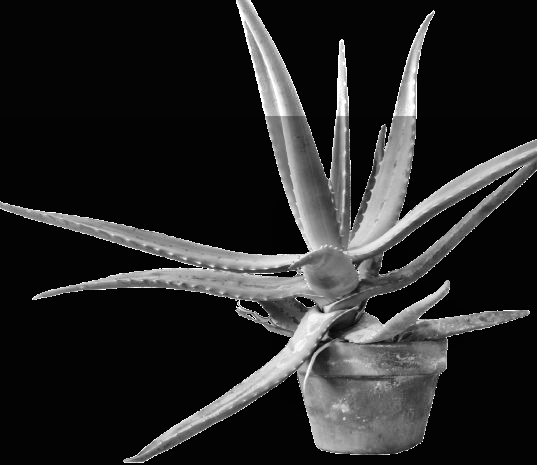

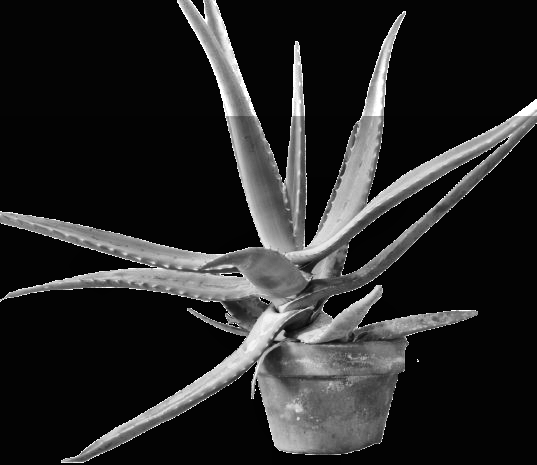

In [17]:
from IPython.display import Image, display

display(Image("output/enhanced_L.png"))
display(Image("output/enhanced_R.png"))


In [18]:
# === Stage 2: Feature Detection (SIFT + AKAZE) ===
sift = cv2.SIFT_create(nfeatures=8000)
akaze = cv2.AKAZE_create()

kp_sift_L, des_sift_L = sift.detectAndCompute(enhL, mask=(alphaL>10).astype(np.uint8))
kp_sift_R, des_sift_R = sift.detectAndCompute(enhR, mask=(alphaR>10).astype(np.uint8))

kp_akaze_L, des_akaze_L = akaze.detectAndCompute(enhL, mask=(alphaL>10).astype(np.uint8))
kp_akaze_R, des_akaze_R = akaze.detectAndCompute(enhR, mask=(alphaR>10).astype(np.uint8))

print(f"SIFT keypoints — Left: {len(kp_sift_L)}, Right: {len(kp_sift_R)}")
print(f"AKAZE keypoints — Left: {len(kp_akaze_L)}, Right: {len(kp_akaze_R)}")
print("✅ Stage 2 complete — Features detected.")




SIFT keypoints — Left: 499, Right: 440
AKAZE keypoints — Left: 588, Right: 622
✅ Stage 2 complete — Features detected.


In [19]:
import cv2
import os
import matplotlib.pyplot as plt

# Create output folder if it doesn't exist
os.makedirs("output", exist_ok=True)

# --- Draw SIFT keypoints ---
img_sift_L = cv2.drawKeypoints(enhL, kp_sift_L, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_sift_R = cv2.drawKeypoints(enhR, kp_sift_R, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# --- Draw AKAZE keypoints ---
img_akaze_L = cv2.drawKeypoints(enhL, kp_akaze_L, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_akaze_R = cv2.drawKeypoints(enhR, kp_akaze_R, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# --- Save images ---
cv2.imwrite("output/keypoints_sift_L.png", img_sift_L)
cv2.imwrite("output/keypoints_sift_R.png", img_sift_R)
cv2.imwrite("output/keypoints_akaze_L.png", img_akaze_L)
cv2.imwrite("output/keypoints_akaze_R.png", img_akaze_R)

print("✅ Stage 2 complete — Keypoint images saved in output/")


✅ Stage 2 complete — Keypoint images saved in output/


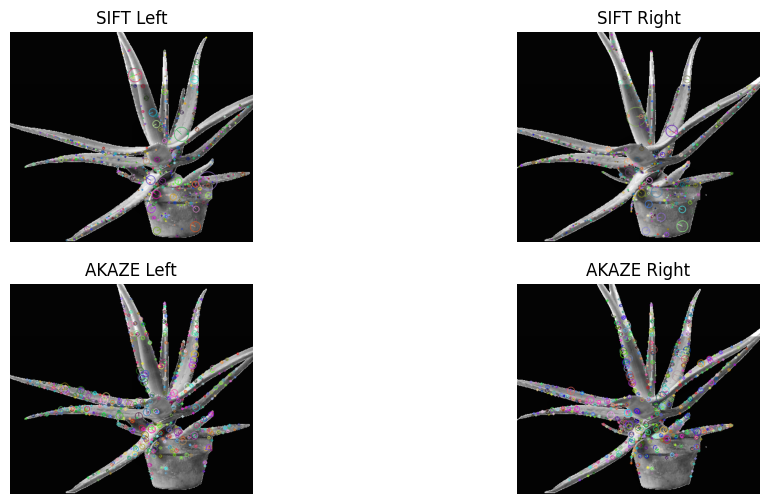

In [20]:
# Display images side by side
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_sift_L, cv2.COLOR_BGR2RGB))
plt.title("SIFT Left"); plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img_sift_R, cv2.COLOR_BGR2RGB))
plt.title("SIFT Right"); plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img_akaze_L, cv2.COLOR_BGR2RGB))
plt.title("AKAZE Left"); plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img_akaze_R, cv2.COLOR_BGR2RGB))
plt.title("AKAZE Right"); plt.axis('off')

plt.show()


Stage 3: 498 combined keypoints ready for RANSAC
Stage 3 complete ✅ — Inlier matches after RANSAC: 233


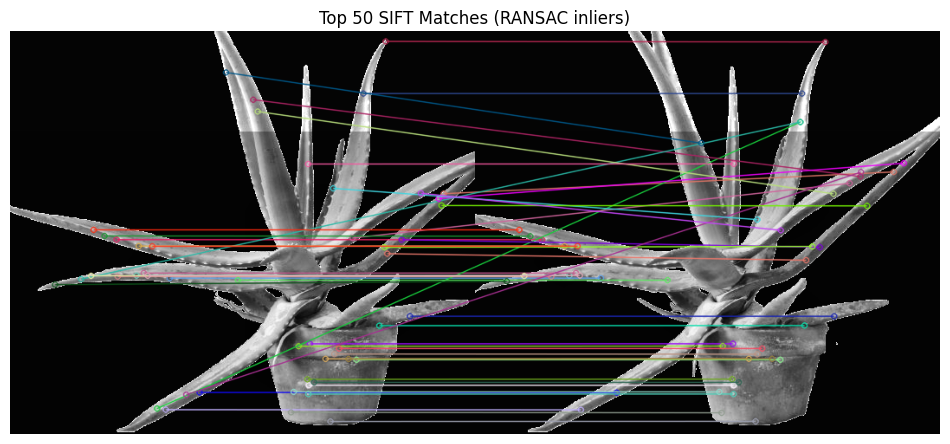


 Mini Analysis:
The Fundamental Matrix (F) encodes the epipolar geometry between the two images.
Each point in the left image maps to a line (epipolar line) in the right image.
RANSAC removes outliers, keeping only geometrically consistent matches.


In [ ]:
# === Stage 3: Fundamental Matrix + RANSAC ===

import numpy as np
import cv2

# --- Step 3.1: Feature Matching ---
# SIFT BFMatcher (L2 distance)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(des_sift_L, des_sift_R)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# AKAZE BFMatcher (Hamming distance)
bf_akaze = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_akaze = bf_akaze.match(des_akaze_L, des_akaze_R)
matches_akaze = sorted(matches_akaze, key=lambda x: x.distance)

# --- Step 3.2: Combine matched points ---
ptsL_sift = np.float32([kp_sift_L[m.queryIdx].pt for m in matches_sift])
ptsR_sift = np.float32([kp_sift_R[m.trainIdx].pt for m in matches_sift])

ptsL_akaze = np.float32([kp_akaze_L[m.queryIdx].pt for m in matches_akaze])
ptsR_akaze = np.float32([kp_akaze_R[m.trainIdx].pt for m in matches_akaze])

ptsL_all = np.vstack([ptsL_sift, ptsL_akaze])
ptsR_all = np.vstack([ptsR_sift, ptsR_akaze])

print(f"Stage 3: {len(ptsL_all)} combined keypoints ready for RANSAC")

# --- Step 3.3: Compute Fundamental Matrix using RANSAC ---
F, mask_inliers = cv2.findFundamentalMat(ptsL_all, ptsR_all, cv2.FM_RANSAC, ransacReprojThreshold=1.0, confidence=0.99)

# --- Step 3.4: Filter inliers ---
inlier_ptsL = ptsL_all[mask_inliers.ravel() == 1]
inlier_ptsR = ptsR_all[mask_inliers.ravel() == 1]

print(f"Stage 3 complete ✅ — Inlier matches after RANSAC: {len(inlier_ptsL)}")

# --- Step 3.5 (Optional): Visualize matches ---
img_matches = cv2.drawMatches(
    enhL, kp_sift_L, enhR, kp_sift_R, matches_sift[:50], None, flags=2
)
cv2.imwrite(os.path.join(output_dir, "matches_sift_ransac.png"), img_matches)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Top 50 SIFT Matches (RANSAC inliers)")
plt.axis("off")
plt.show()

# --- Step 3.6: Quick analysis ---
print("\n Mini Analysis:")
print("The Fundamental Matrix (F) encodes the epipolar geometry between the two images.")
print("Each point in the left image maps to a line (epipolar line) in the right image.")
print("RANSAC removes outliers, keeping only geometrically consistent matches.")


In [ ]:
# === Stage 4: Pose Estimation ===

import numpy as np
import cv2
import os

# --- Step 4.1: Define camera intrinsic matrix K ---
h, w = grayL.shape
f = 0.8 * w  # Approximate focal length in pixels
K = np.array([[f, 0, w/2],
              [0, f, h/2],
              [0, 0, 1]])

# --- Step 4.2: Compute Essential Matrix from Fundamental Matrix ---
E = K.T @ F @ K

# --- Step 4.3: Recover camera pose (R, t) ---
points, R, t, mask_pose = cv2.recoverPose(E, inlier_ptsL, inlier_ptsR, K)

print("Stage 4 complete — Camera pose recovered!")

# --- Step 4.4: Save pose to file ---
pose_file = os.path.join(output_dir, "pose.txt")
with open(pose_file, "w") as f_out:
    f_out.write(f"Rotation Matrix (R):\n{R}\n\nTranslation Vector (t):\n{t}\n")

print(f"Rotation and translation matrices saved to: {pose_file}")

# --- Step 4.5: Quick analysis ---
print("\n Mini Analysis:")
print(f"Rotation Matrix R:\n{R}")
print(f"\nTranslation Vector t:\n{t}")
print("\nThe translation vector 't' represents the direction of the second camera relative to the first.")
print("Its magnitude is up-to-scale; absolute distance cannot be recovered without calibration or scale info.")


Stage 4 complete — Camera pose recovered!
Rotation and translation matrices saved to: output/pose.txt

 Mini Analysis:
Rotation Matrix R:
[[ 0.99997106 -0.0048149  -0.00589009]
 [ 0.00474598  0.99992077 -0.01165925]
 [ 0.00594576  0.01163096  0.99991468]]

Translation Vector t:
[[-0.93061718]
 [-0.04706798]
 [-0.36295492]]

The translation vector 't' represents the direction of the second camera relative to the first.
Its magnitude is up-to-scale; absolute distance cannot be recovered without calibration or scale info.


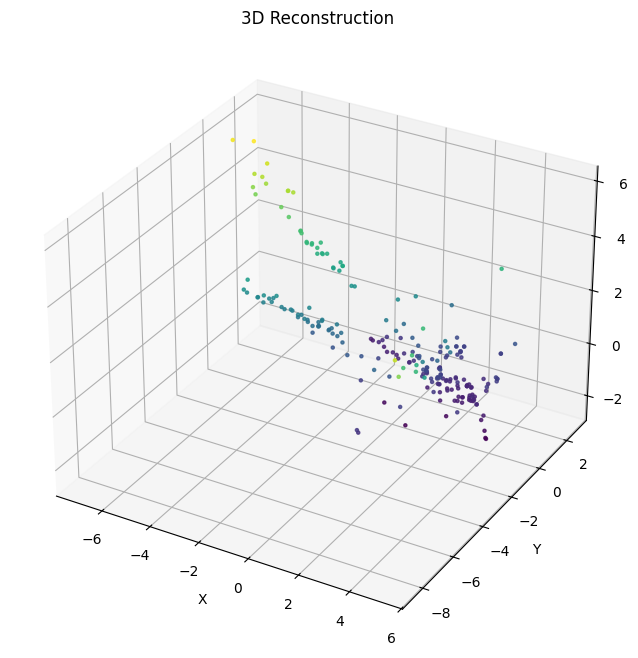

✅ Stage 5 complete — 3D reconstruction saved: output/reconstruction.png

=== 3D Reconstruction Stats ===
Number of 3D points before filtering: 233
Number of 3D points after Z-filtering: 227
X range: -7.03 → 5.16
Y range: -8.49 → 2.66
Z range: -2.35 → 5.94


In [ ]:
# === Stage 5: 3D Triangulation & Visualization ===

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# --- Step 5.1: Define projection matrices ---
# Camera 1: reference (identity)
P1 = K @ np.hstack((np.eye(3), np.zeros((3,1))))
# Camera 2: second camera (R, t)
P2 = K @ np.hstack((R, t))

# --- Step 5.2: Triangulate points ---
points_hom = cv2.triangulatePoints(P1, P2, inlier_ptsL.T, inlier_ptsR.T)
# Convert from homogeneous to 3D
points_3d = points_hom[:3, :] / points_hom[3, :]

# --- Step 5.3: Center & filter extremes (optional) ---
mean_xyz = np.mean(points_3d, axis=1, keepdims=True)
points_3d_centered = points_3d - mean_xyz
z_min, z_max = np.percentile(points_3d_centered[2, :], [1, 99])
mask = (points_3d_centered[2, :] >= z_min) & (points_3d_centered[2, :] <= z_max)
points_3d_filtered = points_3d_centered[:, mask]

# --- Step 5.4: Plot 3D point cloud ---
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
x, y, z = points_3d_filtered
ax.scatter(x, y, z, c=z, cmap='viridis', s=5, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Reconstruction')
plt.show()

# --- Step 5.5: Save figure ---
recon_file = os.path.join(output_dir, "reconstruction.png")
fig.savefig(recon_file)
print(f"✅ Stage 5 complete — 3D reconstruction saved: {recon_file}")

# --- Step 5.6: Quick stats ---
print("\n=== 3D Reconstruction Stats ===")
print(f"Number of 3D points before filtering: {points_3d.shape[1]}")
print(f"Number of 3D points after Z-filtering: {points_3d_filtered.shape[1]}")
print(f"X range: {points_3d_filtered[0,:].min():.2f} → {points_3d_filtered[0,:].max():.2f}")
print(f"Y range: {points_3d_filtered[1,:].min():.2f} → {points_3d_filtered[1,:].max():.2f}")
print(f"Z range: {points_3d_filtered[2,:].min():.2f} → {points_3d_filtered[2,:].max():.2f}")


 Stage 6 complete — Animation saved: output/rotation_animation.mp4


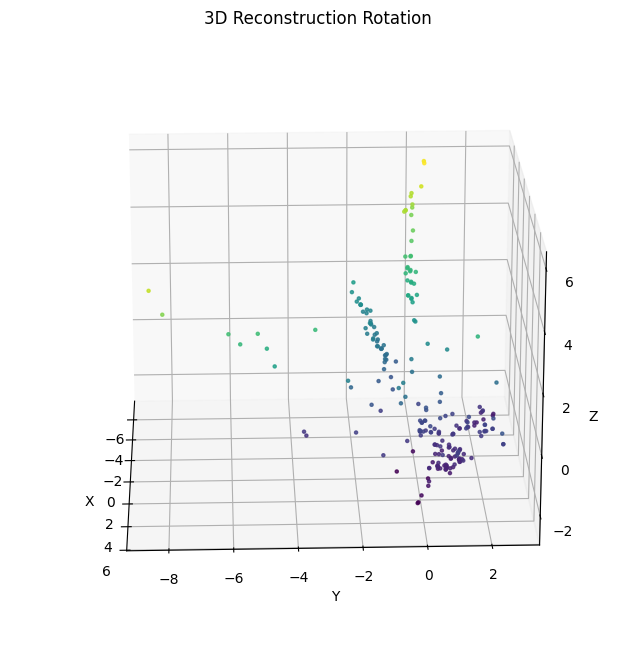

In [ ]:
# === Stage 6: Rotating 3D Point Cloud Animation ===

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np
import os

# Create output folder for animation
anim_file = os.path.join(output_dir, "rotation_animation.mp4")

# --- Step 6.1: Prepare 3D points ---
x, y, z = points_3d_filtered

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=5, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Reconstruction Rotation')

# --- Step 6.2: Animation function ---
def rotate(angle):
    ax.view_init(elev=20, azim=angle)
    return sc,

# --- Step 6.3: Create animation ---
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50, blit=True)

# --- Step 6.4: Save animation ---
ani.save(anim_file, writer='ffmpeg', dpi=150)
print(f" Stage 6 complete — Animation saved: {anim_file}")

# --- Optional: Display first frame in notebook ---
plt.show()
